In [20]:
import numpy as np
import pandas as pd
import operator
import os
from sklearn import model_selection
import re

In [2]:
#STOP WORDS TAKEN FROM INTERNET
stop_word=["a","about","above","after","again","against","all","am","an","and","any","are","as","at","be","because","been","before","being","below","between","both","but",
"by","could","did","do","does","doing","down","during","each","few","for","from","further","had","has","have","having","he","he'd","he'll","he's","her",
"here","here's","hers","herself","him","himself","his","how","how's","i","i'd","i'll","i'm","i've","if","in","into","is","it","it's","its","itself","let's","me",
"more","most","my","myself","nor","of","on","once","only","or","other","ought","our","ours","ourselves","out","over","own","same","she",
"she'd","she'll","she's","should","so","some","such","than","that","that's","the","their","theirs","them","themselves","then","there","there's",
"these","they","they'd","they'll","they're","they've","this","those","through","to","too","under","until","up","very","was","we","we'd",
"we'll","we're","we've","were","what","what's","when","when's","where","where's","which","while","who","who's","whom","why","why's","with",
"would","you","you'd","you'll","you're","you've","your","yours","yourself","yourselves"]

In [3]:
#X is a list further made in form of tuple , where first element is name of document and second is the text in documents.
#Y is the category
X  =[] 
Y = []
#opening various folders related to category and their files
for category in os.listdir('20_newsgroups'):
    #it was a problematic folder so had to skip it(not related to data)
    if(category == '.DS_Store'):
        continue
    for document in os.listdir("20_newsgroups/"+category):
        with open("20_newsgroups/"+category+'/'+document, "r", encoding = 'latin1') as f:
            X.append((document,f.read()))
            Y.append(category)


In [4]:
#splitting the data in training and testing
x_train,x_test,y_train,y_test=model_selection.train_test_split(X,Y)

In [5]:
#Making Dictionary of words with their corresponding frequency
dic={}
for i in range(len(x_train)):
    #Took [1] because [0] is name of doc and [1] is text in doc
    word=x_train[i][1].lower()
    #splitting the text into words
    stripped=re.split(r'\W+',word)
    #Iterating over each word
    for s in stripped:
        #not including stop_words, alpha-numerics, punctuations or irrelevant word of length less than 2 in our dictionary
        if not(s.isalpha()) or s in stop_word or len(s)<=2:
            continue
        if s in dic:
            dic[s]+=1
        else:
            dic[s]=1
dic

{'path': 15268,
 'cantaloupe': 19520,
 'srv': 24266,
 'cmu': 39248,
 'edu': 122469,
 'magnesium': 3276,
 'club': 3463,
 'news': 25757,
 'sei': 4644,
 'cis': 4333,
 'ohio': 11840,
 'state': 14099,
 'pacific': 801,
 'mps': 6916,
 'zaphod': 6232,
 'utexas': 3180,
 'unisql': 120,
 'wrat': 26,
 'uucp': 2213,
 'wharfie': 19,
 'newsgroups': 15301,
 'rec': 4732,
 'autos': 1402,
 'subject': 16159,
 'can': 14902,
 'get': 6386,
 'new': 5018,
 'york': 704,
 'taxi': 5,
 'message': 16493,
 'date': 15603,
 'apr': 15353,
 'gmt': 13321,
 'references': 9703,
 'srgenprp': 85,
 'com': 37545,
 'distribution': 3523,
 'organization': 14875,
 'inc': 1619,
 'austin': 775,
 'texas': 632,
 'usa': 2574,
 'lines': 15711,
 'article': 10015,
 'almanb': 1,
 'bob': 690,
 'alman': 1,
 'writes': 10980,
 'hose': 20,
 'dork': 3,
 'xref': 4533,
 'comp': 9863,
 'robotics': 76,
 'sci': 6541,
 'electronics': 1238,
 'rochester': 3607,
 'udel': 3190,
 'gatech': 3277,
 'howland': 8267,
 'reston': 8252,
 'ans': 8347,
 'net': 1909

In [6]:
#Sorting the dictionary on basis of frequency of words in descending order
sorted_dic = sorted(dic.items(), key=operator.itemgetter(1),reverse=True)

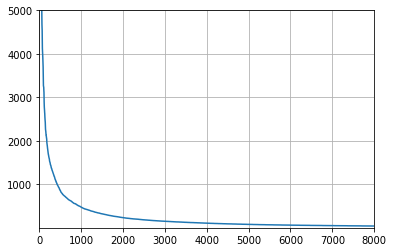

In [7]:
import matplotlib.pyplot as plt
#Plotting graph on no. of words vs frequency 
#On basis of graph we can decide the number of features we want to take
features=sorted_dic
#list to gather the frequency of occurence
answer1=[]
#list to gather the number of words
answer2=[]
for i in range(len(features)):
    answer1.append(i)
    answer2.append(features[i][1])
plt.plot(answer1,answer2)
plt.axis([0,8000,1,5000])
plt.grid()
plt.show()

In [8]:
#We decided to take top 3500 words with max freuqency as our feature
#here feature list is answer1
answer1=[features[i][0] for i in range(3500)]

In [9]:
#Making x_train dataset
#No. of rows is equivalent to rows in x_train, and column is equal to length of answer1(feature list)
x_train_dataset=np.zeros([len(x_train),len(answer1)],int)
for i in range(len(x_train)):
    words=x_train[i][1].lower()
    word=re.split(r'\W+',words)
    #Iterating over each word
    for j in word:
        #We will add the frequency corresponding to that word only which is in our answer1(feature list)
        if j in answer1:
            x_train_dataset[i][answer1.index(j)]+=1

In [10]:
#Making x_test dataset
#No. of rows is equivalent to rows in x_test, and column is equal to length of answer1(feature list)
x_test_dataset=np.zeros([len(x_test),len(answer1)],int)
for i in range(len(x_test)):
    words=x_test[i][1].lower()
    word=re.split(r'\W+',words)
    #Iterating over each word
    for j in word:
        #We will add the frequency corresponding to that word only which is in our answer1(feature list)
        if j in answer1:
            x_test_dataset[i][answer1.index(j)]+=1

In [11]:
#Making dictionary for implementing Multinomial Naive Baye's
def fit(x_train_dataset,y_train):
    count={}
    total_word=0
    y_train=np.array(y_train)
    #Total no. of document is calculated
    count["total_doc"]=len(y_train)
    #getting the distinct classes
    classes=set(y_train)
    for i in classes:
        temp=0
        #selecting x_train corresponding to class present in y_train
        x_train_with_i=x_train_dataset[y_train==i]
        #finding length of data with category corresponding to i 
        temp2=x_train_with_i.shape[0]
        count[i]={}
        #Iterating over answer1(actual feature list)
        for feature in answer1:
            #Calculating total word in feature
            l=(x_train_with_i[:,answer1.index(feature)]).sum()
            count[i][feature]=l
            temp+=l
        #Total word in that class
        count[i]["word_in_class"]=temp
        #Length of data with y_train belonging to specific class
        count[i]["length"]=temp2
        
    
    return count

In [12]:
def probability(x_test,dic,classes):
    #the probability of the class
    prob=np.log(dic[classes]["length"])-np.log(dic["total_doc"])
    feature=list(dic[classes].keys())
    #calculating the probability of the features
    #-2 is done becuase there will be "length" and "word in class" present in feature. 
    for j in range (len(feature)-2):
        xj=x_test[j]
        #If frequency is 0, we will not consider it
        if xj==0:
            current_prob=0
        else:
            #Extra addition part is Laplace correction
            num=dic[classes][feature[j]]+1
            den=dic[classes]["word_in_class"]+len(dic[classes].keys())-2
            current_prob=np.log(num)-np.log(den)
        prob+=current_prob
    return prob

In [13]:
#Best_class or probable answer will be returned from here
def predict_for_single(x_test,dic):
    first_run=True
    classes=dic.keys()
    for i in classes:
        if i=="total_doc":
            continue
        prob=probability(x_test,dic,i)
        #updating the best_class if we find any with probability greater than that of the best_class
        if first_run or prob>best_prob:
            best_prob=prob
            first_run=False
            best_class=i
    return best_class

In [14]:
def predict_(x_test,dic):
    y_pred=[]
    for x in x_test:
        y_pred.append(predict_for_single(x,dic))
    return y_pred

In [15]:
def score(y_test,y_pred):
        count = 0
        for i in range(len(y_pred)):
            if y_pred[i] == y_test[i]:
                count+=1
        return count/len(y_pred)

In [16]:
#this part will take SOME MINUTES 
dictionary=fit(x_train_dataset,y_train)
y_pred=predict_(x_test_dataset,dictionary)

In [17]:
dictionary

{'total_doc': 14997,
 'sci.space': {'edu': 6241,
  'cmu': 2107,
  'com': 1407,
  'news': 1340,
  'not': 1026,
  'srv': 1247,
  'cantaloupe': 1033,
  'net': 1311,
  'message': 829,
  'subject': 815,
  'lines': 825,
  'date': 812,
  'apr': 713,
  'newsgroups': 770,
  'path': 766,
  'can': 680,
  'organization': 776,
  'state': 548,
  'gmt': 632,
  'ohio': 485,
  'one': 548,
  'will': 662,
  'writes': 598,
  'article': 523,
  'comp': 10,
  'references': 578,
  'talk': 169,
  'misc': 195,
  'ans': 395,
  'howland': 385,
  'sender': 407,
  'reston': 411,
  'don': 327,
  'people': 230,
  'like': 449,
  'just': 429,
  'university': 318,
  'posting': 425,
  'nntp': 403,
  'mps': 310,
  'know': 235,
  'host': 370,
  'sci': 2051,
  'get': 303,
  'think': 260,
  'usenet': 262,
  'zaphod': 280,
  'may': 399,
  'alt': 142,
  'politics': 106,
  'windows': 9,
  'also': 380,
  'harvard': 260,
  'time': 302,
  'use': 224,
  'near': 301,
  'eng': 303,
  'rutgers': 5,
  'new': 285,
  'rec': 69,
  'crabap

In [18]:
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score
import pandas as pd
print("Score on testing_data:",score(y_test,y_pred))
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))

Score on testing_data: 0.8808
[[217   0   0   0   0   0   0   0   1   0   0   0   3   2   0   0   0   0
    0  19]
 [  0 192   7  21   6   4   6   0   0   0   0   1   4   0   0   0   0   0
    0   0]
 [  0  12 199  27   1  19   4   0   0   0   0   0   1   0   0   0   0   0
    0   0]
 [  0   3   0 204  19   1   5   0   0   0   0   1   1   0   0   0   0   0
    0   0]
 [  0   1   0  15 203   0   2   0   0   0   0   0   0   0   0   0   0   0
    0   0]
 [  0  24   5   5   3 209   0   0   1   0   0   2   5   2   0   0   0   0
    0   0]
 [  0   1   0   4   2   0 250   3   1   0   0   0   4   2   0   0   0   0
    0   0]
 [  0   0   0   0   0   1   4 236   4   0   0   0   5   1   0   0   3   0
    0   0]
 [  0   1   0   0   0   0   3   5 238   0   0   0   1   0   1   0   0   0
    0   0]
 [  0   0   0   0   0   0   2   1   1 245   4   0   0   0   1   0   0   0
    0   0]
 [  0   0   0   0   0   0   0   0   2   3 255   0   0   0   0   0   0   0
    1   0]
 [  0   3   0   1   1   0   0   0  

In [19]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score
#Demonstrating confusion-matrix and classification report
clf=MultinomialNB()
clf.fit(x_train_dataset,y_train)
y_pred=clf.predict(x_test_dataset)
print("Score on training data:",clf.score(x_train_dataset,y_train))
print("Score on testing data:",clf.score(x_test_dataset,y_test))
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))

Score on training data: 0.9077815563112622
Score on testing data: 0.8726
[[193   0   0   0   1   0   0   0   2   0   0   0   3   0   0   1   0   1
    1  40]
 [  0 182  13  19   6   6   6   1   0   0   1   1   6   0   0   0   0   0
    0   0]
 [  0   3 211  22   3  15   4   2   0   0   0   1   1   1   0   0   0   0
    0   0]
 [  0   1   2 195  25   0   6   1   0   0   0   1   3   0   0   0   0   0
    0   0]
 [  0   1   1  14 198   0   4   0   0   0   0   0   3   0   0   0   0   0
    0   0]
 [  0  17   7   7   8 206   3   0   0   0   0   1   5   0   2   0   0   0
    0   0]
 [  0   0   0   4   1   0 249   5   0   0   0   0   6   0   1   0   1   0
    0   0]
 [  0   0   0   0   0   0   6 236   5   0   0   0   6   0   0   0   1   0
    0   0]
 [  0   0   0   0   0   0   3   6 237   0   0   0   2   0   1   0   0   0
    0   0]
 [  0   0   0   0   0   0   3   4   1 237   9   0   0   0   0   0   0   0
    0   0]
 [  0   0   0   0   1   1   0   0   1  10 246   0   1   0   0   0   0   0
   